In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

import io, pickle, zipfile
from zipfile import ZipFile

import warnings
warnings.filterwarnings("ignore")

##### 1. Скачайте материалы к занятию.
##### 2. Проанализируйте ряды и сделайте их стационарными.
##### 3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [25]:
with ZipFile('Series.zip', 'r') as myzip:
    for item in myzip.infolist():
        print(f'File Name: {item.filename} ')

File Name: international-airline-passengers.csv 
File Name: mean-monthly-air-temperature-deg.csv 
File Name: monthly-boston-armed-robberies-j.csv 
File Name: monthly-sales-of-company-x-jan-6.csv 
File Name: weekly-closings-of-the-dowjones-.csv 
File Name: daily-total-female-births-in-cal.csv 


In [72]:
with ZipFile('Series.zip', 'r') as myzip:
    myzip.extractall()

int_air_pass = pd.read_csv('international-airline-passengers.csv').iloc[:, 1]
m_m_air_temp = pd.read_csv('mean-monthly-air-temperature-deg.csv').iloc[:, 1]
m_boston_a_rob = pd.read_csv('monthly-boston-armed-robberies-j.csv').iloc[:, 1]
m_s_comp = pd.read_csv('monthly-sales-of-company-x-jan-6.csv').iloc[:, 1]
w_c_dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv').iloc[:, 1]
d_t_female = pd.read_csv('daily-total-female-births-in-cal.csv').iloc[:, 1]

In [27]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value', '#Lags Used',
                                             'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def tsplot(y, lags=None, figsize=(16, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


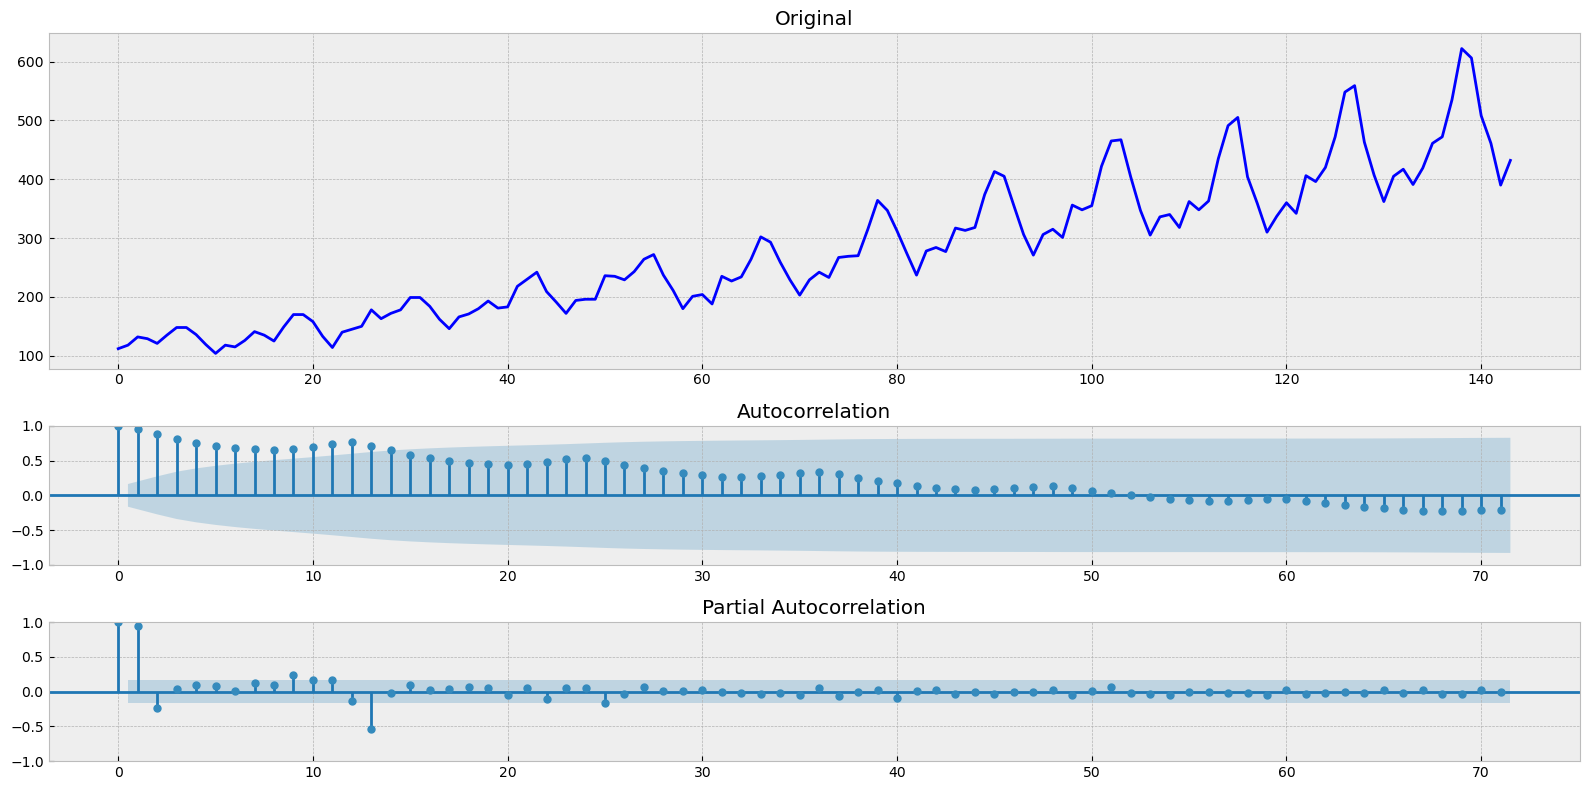

In [32]:
tsplot(int_air_pass, lags = len(int_air_pass)/2 - 1)

Исходный ряд стационарным не является, критерий Дики-Фуллера не отверг нулевую гипотезу о нестационарности ряда. Попробуем стабилизировать дисперсию преоразованием Бокса-Кокса

In [33]:
int_air_pass = boxcox(int_air_pass, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


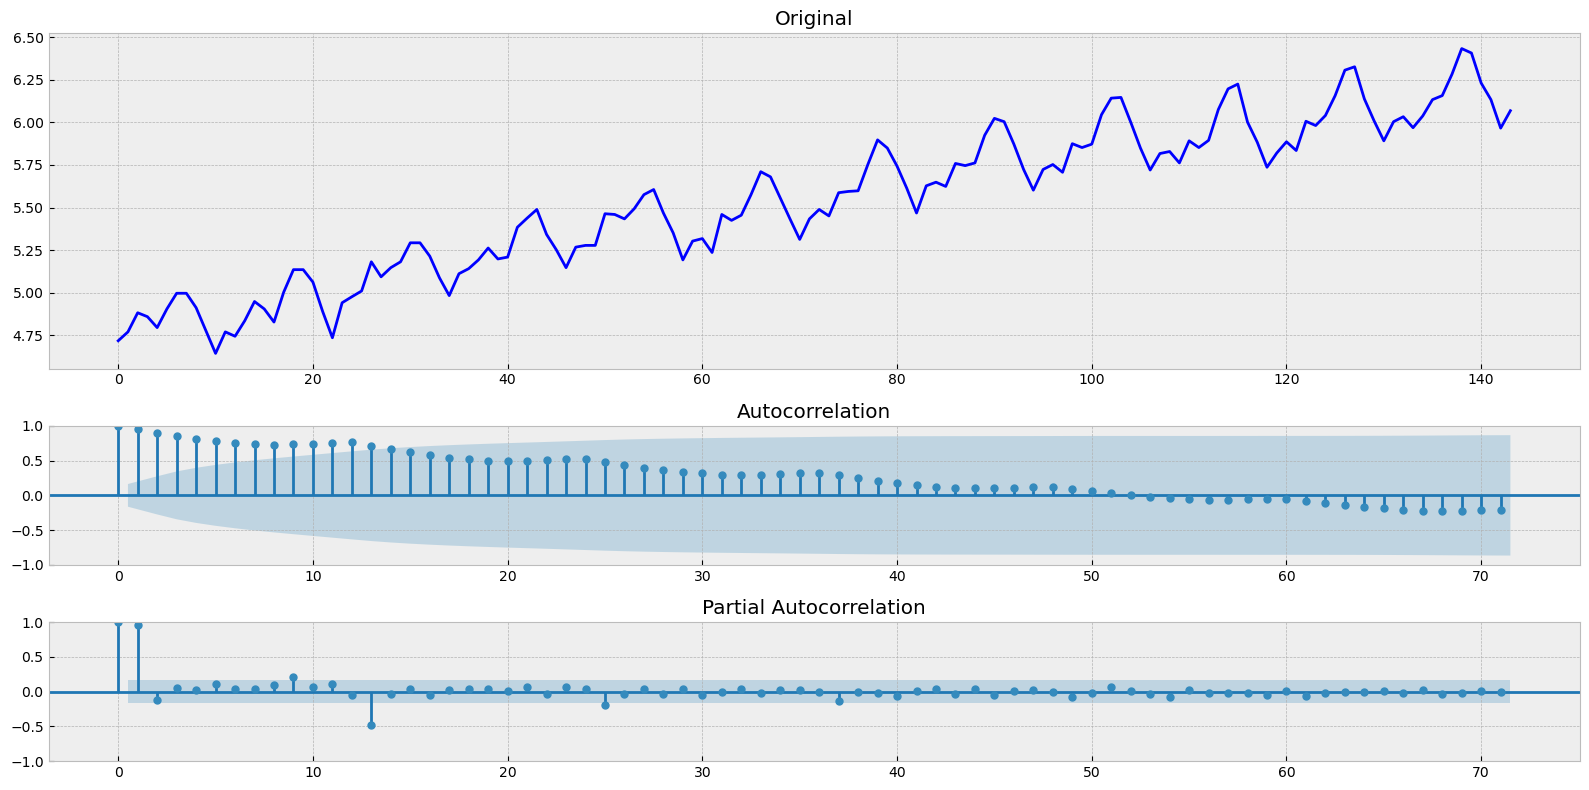

In [34]:
tsplot(int_air_pass, lags = len(int_air_pass)/2 - 1)

In [35]:
int_air_pass = int_air_pass[1:] - int_air_pass[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


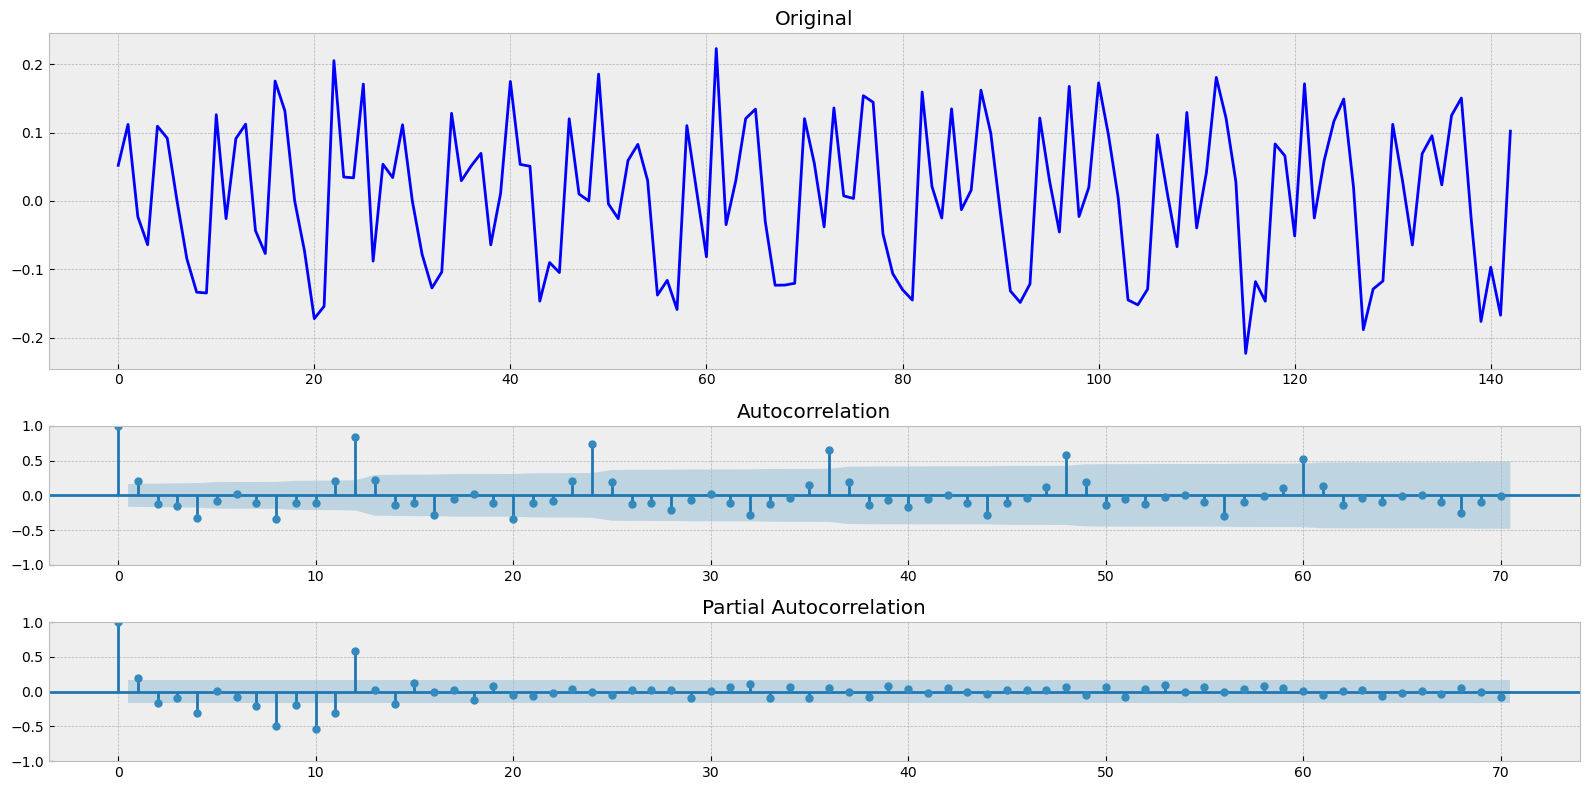

In [36]:
tsplot(int_air_pass, lags = len(int_air_pass)/2 - 1)

p-value значительно снизилось и дает возможность отвергнуть гипотезу о нестационарности ряда, но график показывает наличие сезонности с интервалом, равным 12. Продолжим приводить ряд в стационарное состояние

In [37]:
int_air_pass = int_air_pass[12:] - int_air_pass[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


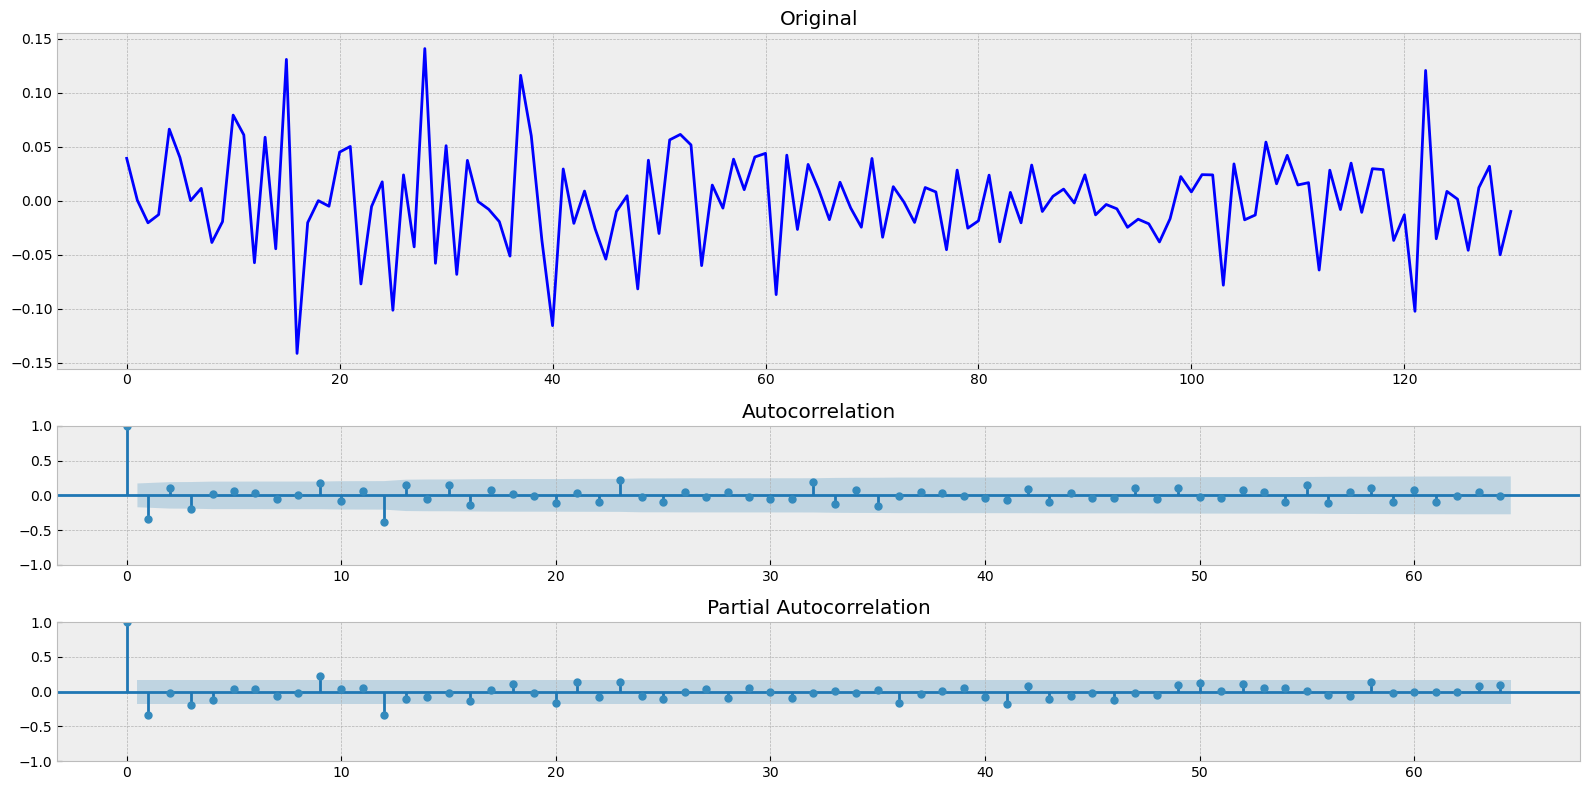

In [39]:
tsplot(int_air_pass, lags = len(int_air_pass)/2 - 1)

p-value стремится к нулю. Можно принять гипотезу о стационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


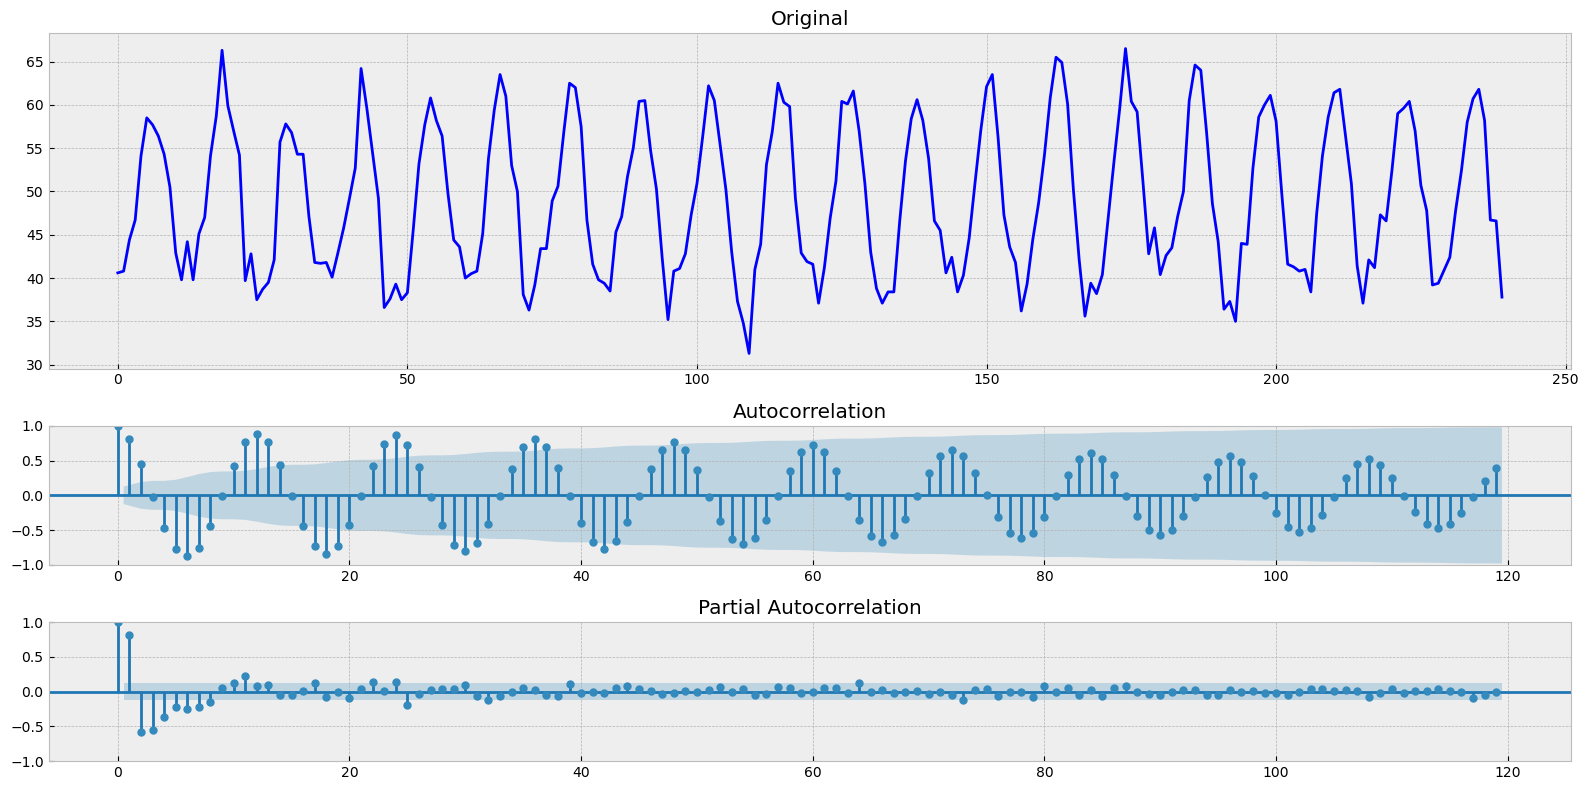

In [47]:
# судя по содержимому, имеем данные о средне-месячной температуре воздуха в градусах Фаренгейта
tsplot(m_m_air_temp, lags = len(m_m_air_temp)/2 - 1)

p-value значительно ниже 0,05 и дает возможность отвергнуть гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


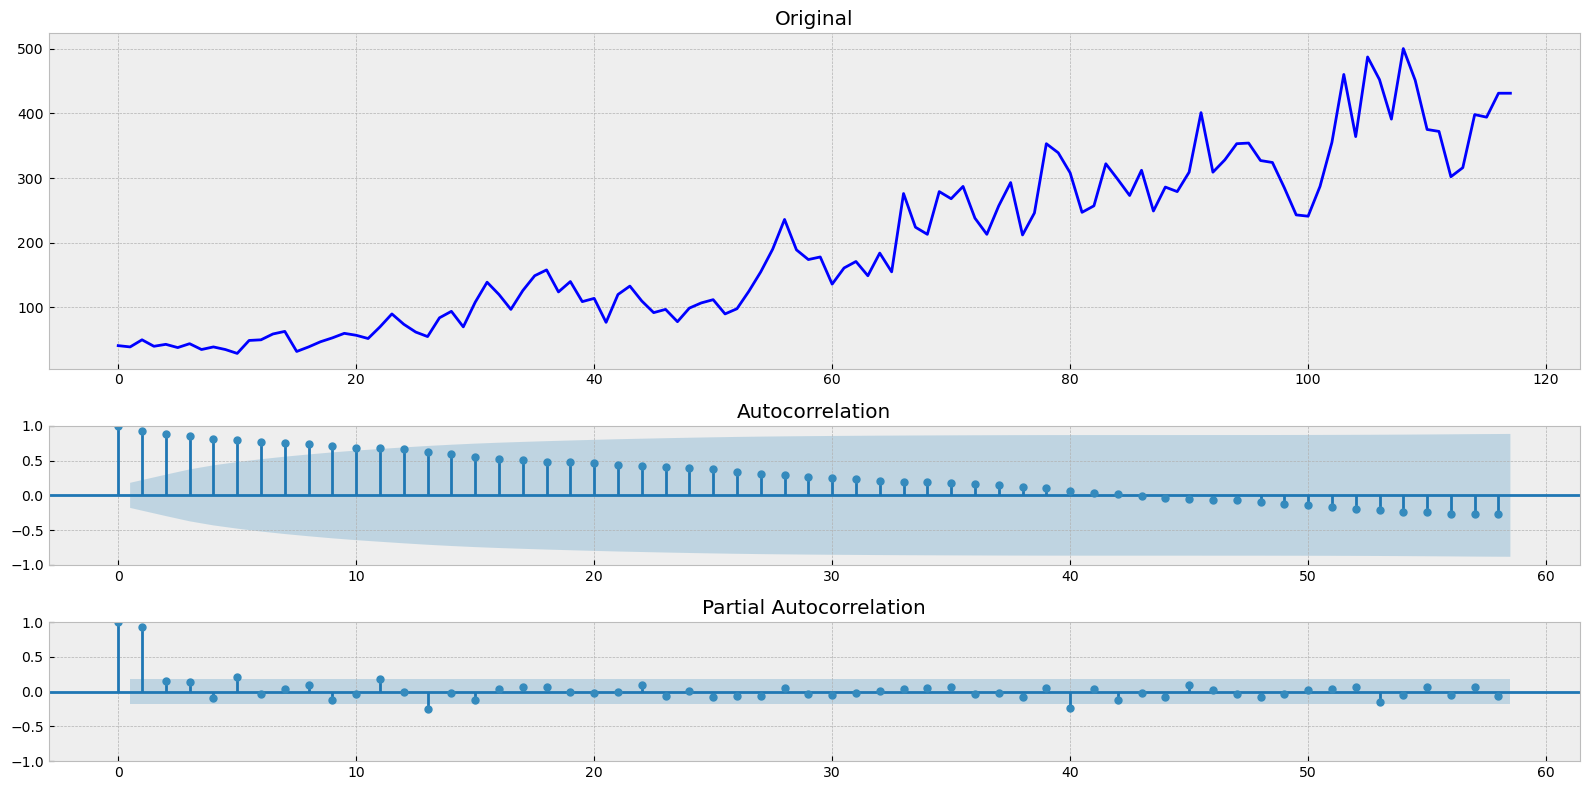

In [54]:
tsplot(m_boston_a_rob, lags = len(m_boston_a_rob)/2 - 1)

In [55]:
m_boston_a_rob = boxcox(m_boston_a_rob, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


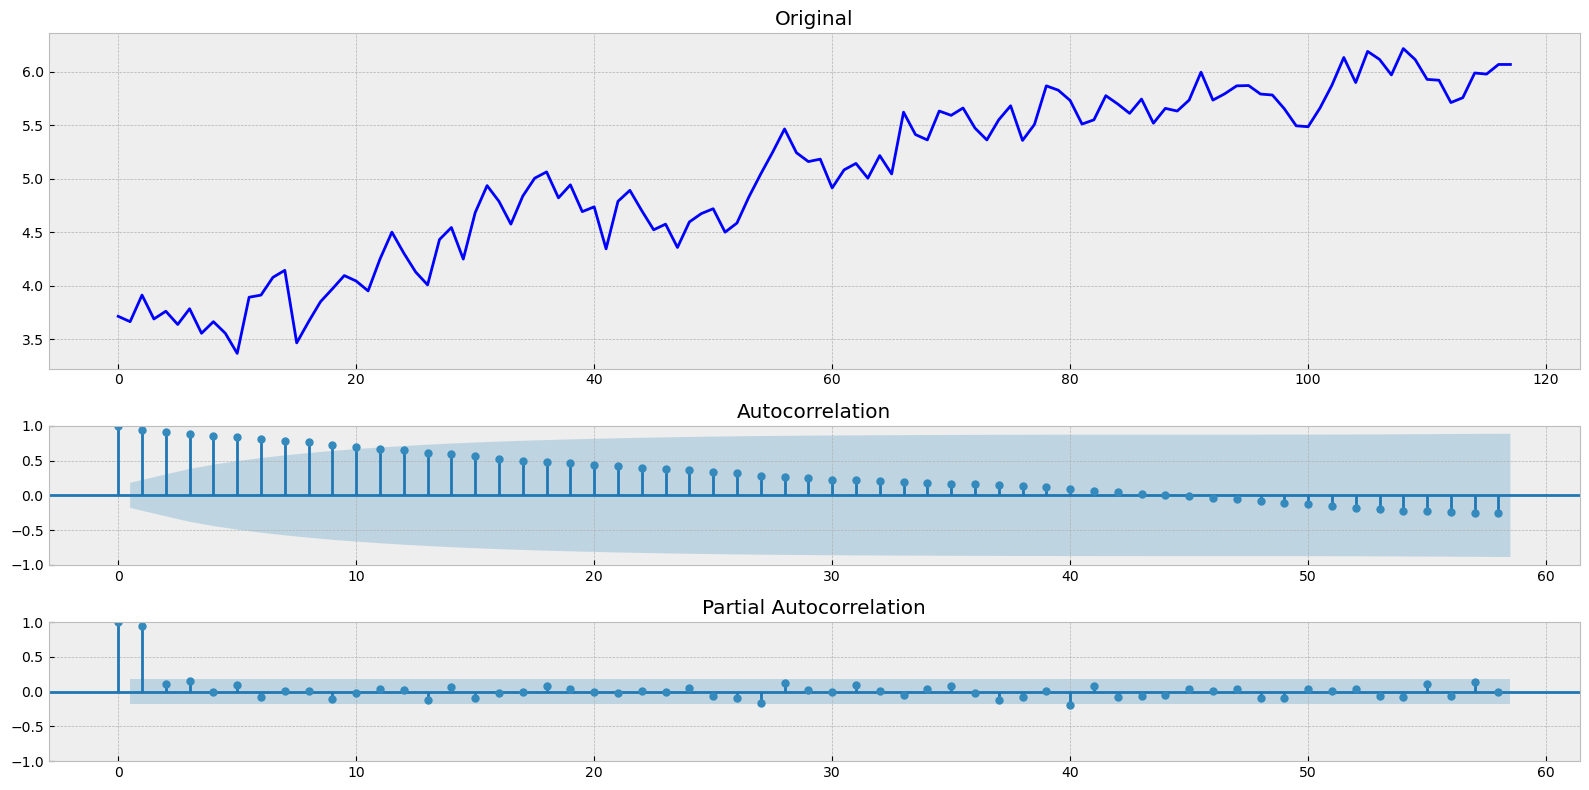

In [56]:
tsplot(m_boston_a_rob, lags = len(m_boston_a_rob)/2 - 1)

In [57]:
m_boston_a_rob = m_boston_a_rob[1:] - m_boston_a_rob[: -1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


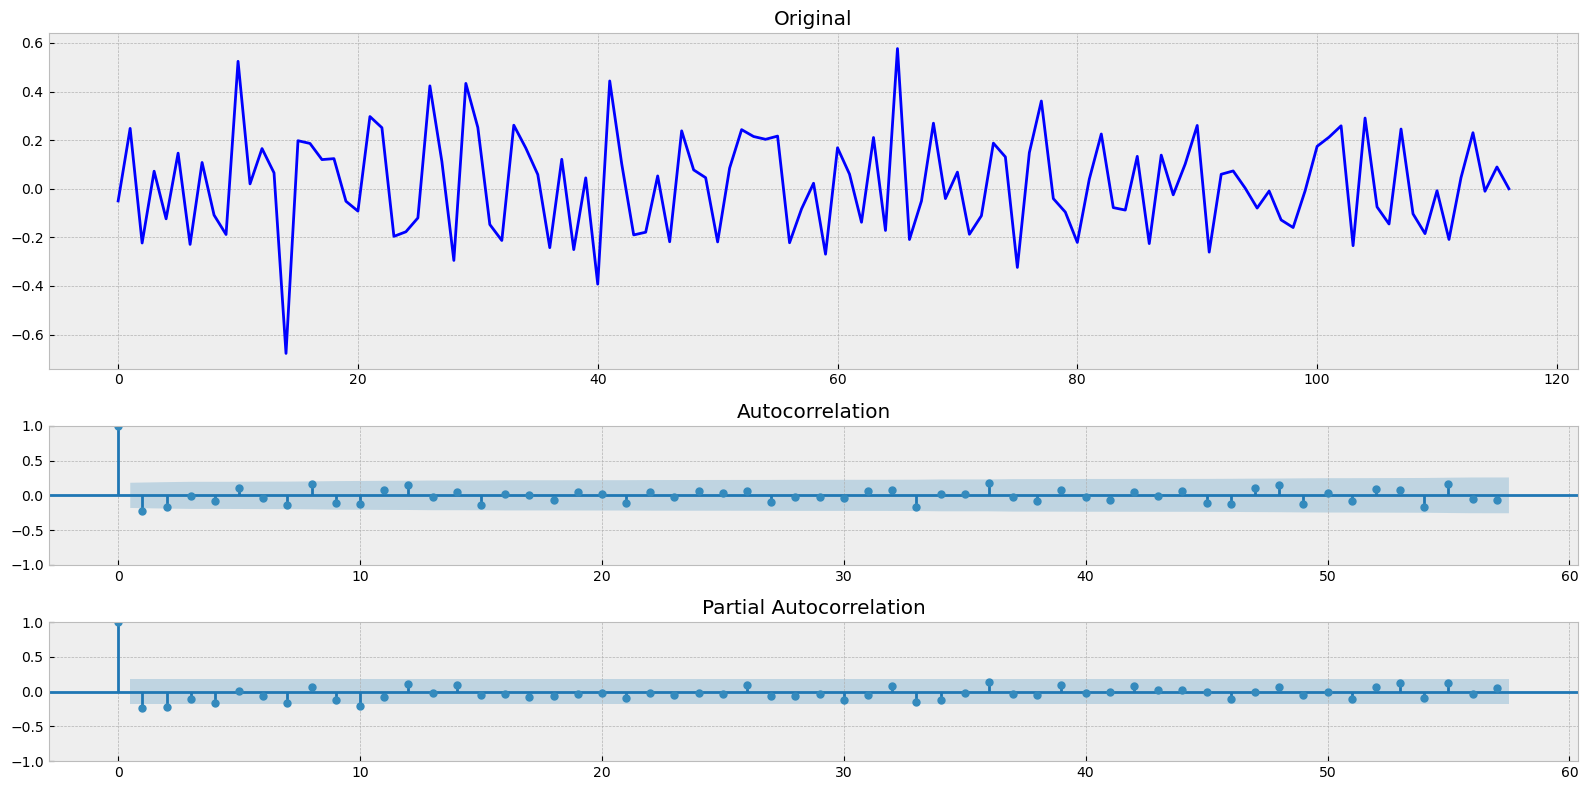

In [58]:
tsplot(m_boston_a_rob, lags = len(m_boston_a_rob)/2 - 1)

p-value значительно ниже 0,05 и дает возможность отвергнуть гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


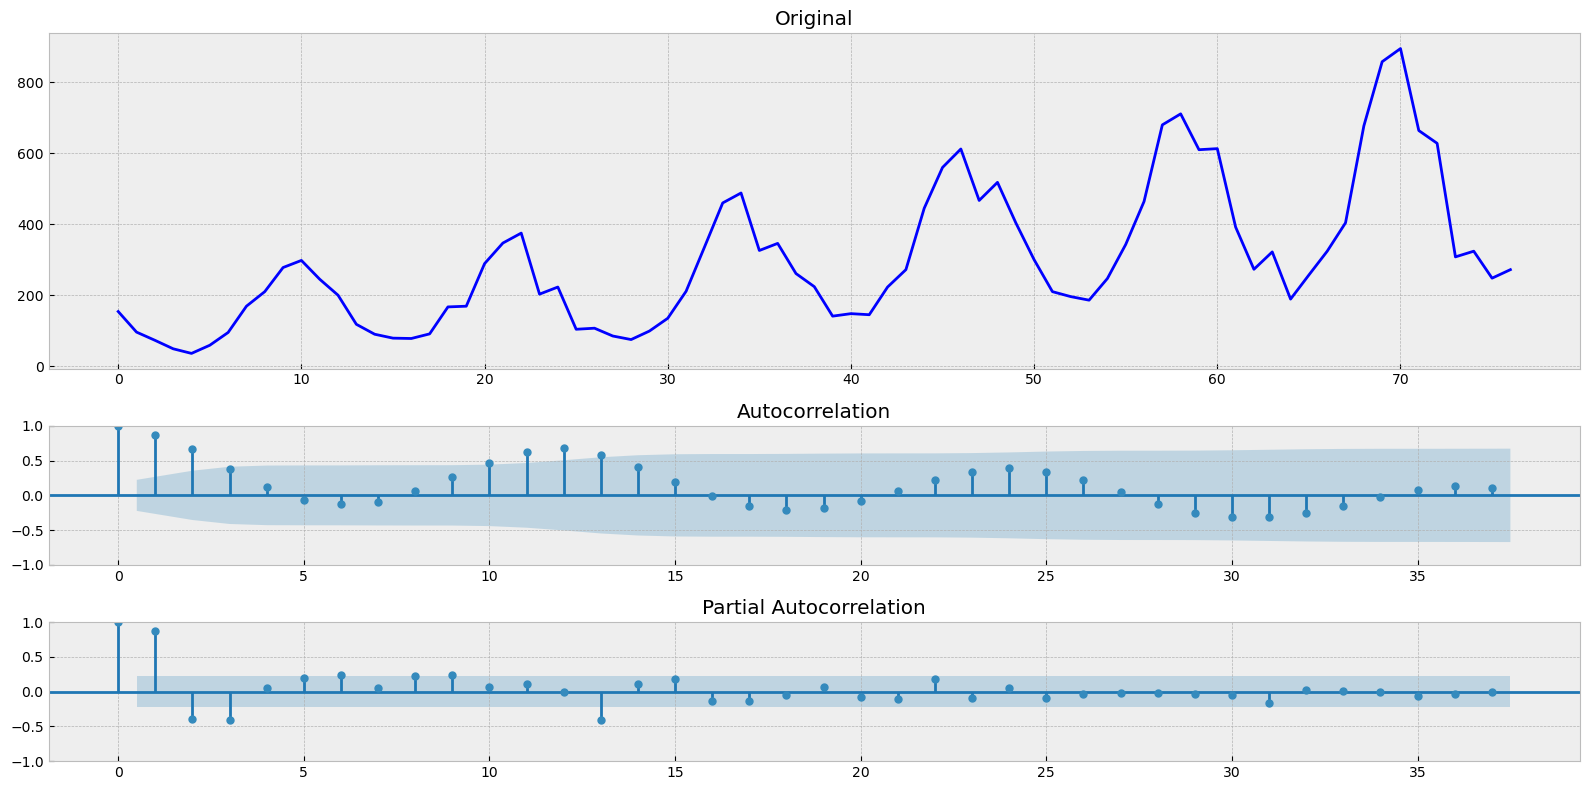

In [73]:
tsplot(m_s_comp, lags = len(m_s_comp)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


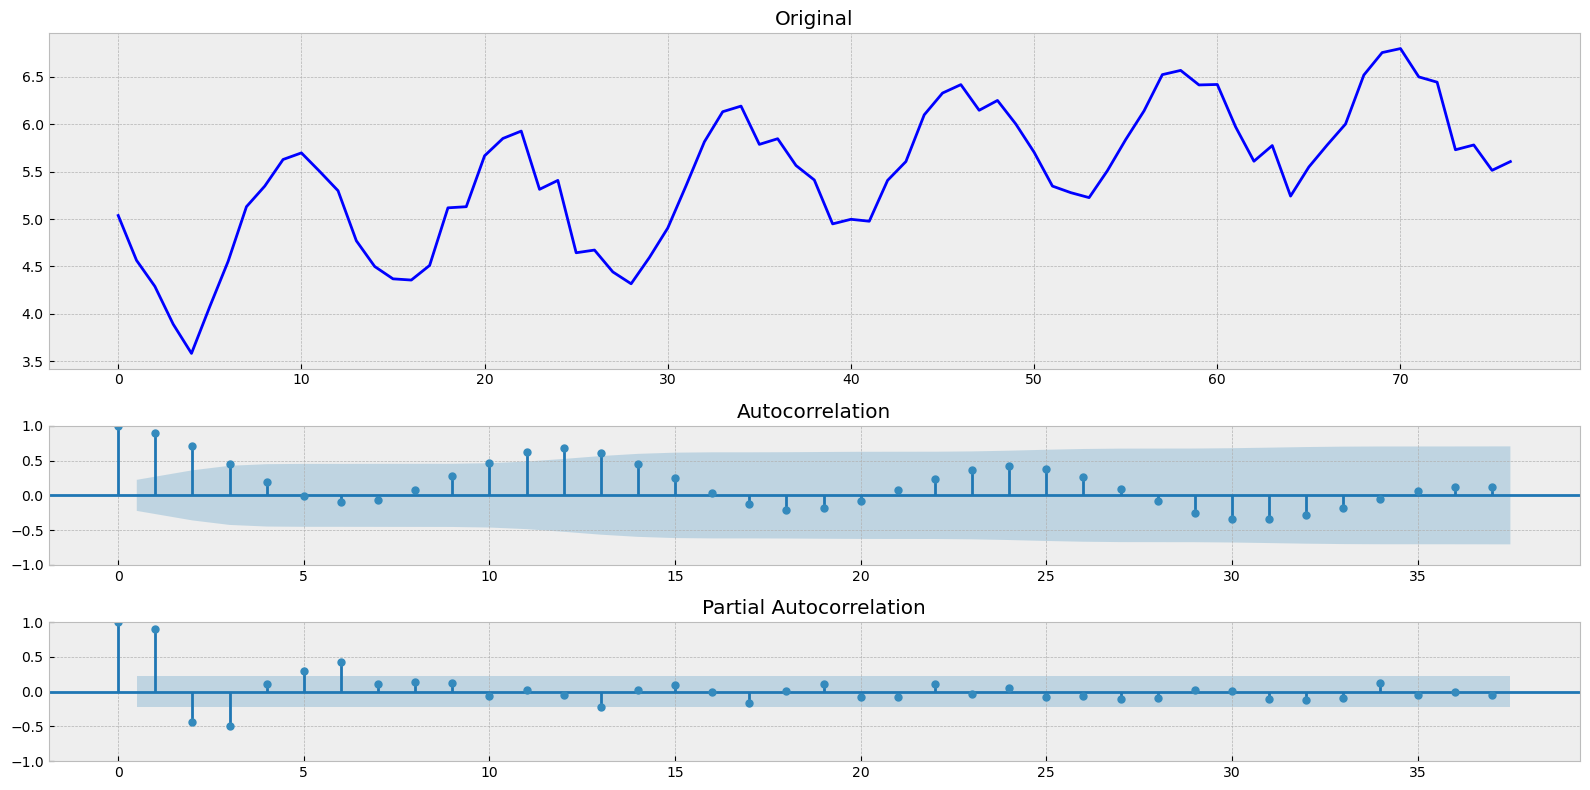

In [74]:
m_s_comp = boxcox(m_s_comp, 0)
tsplot(m_s_comp, lags = len(m_s_comp)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


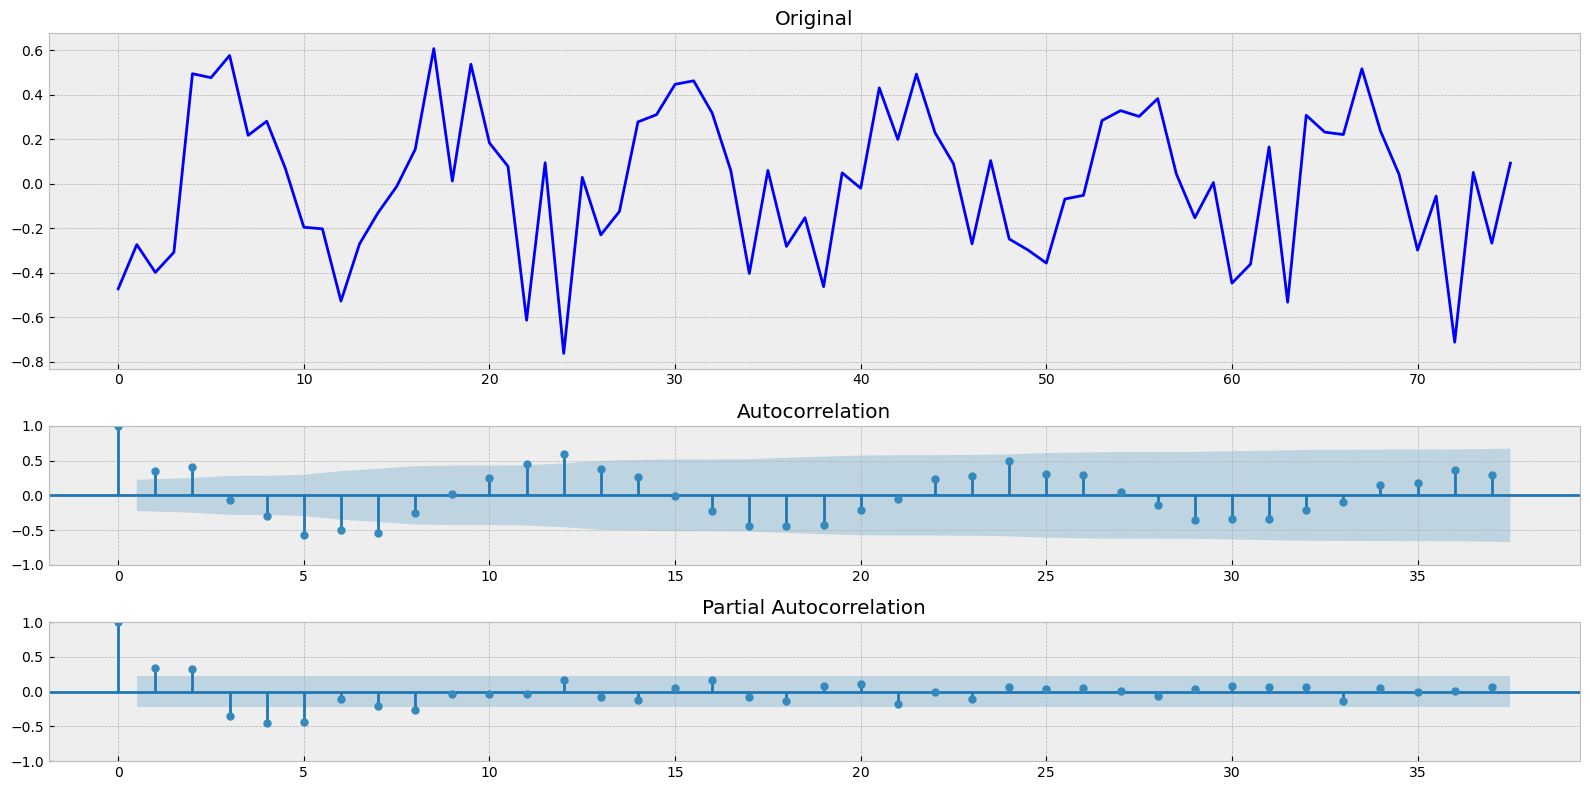

In [75]:
m_s_comp = m_s_comp[1:] - m_s_comp[: -1]
tsplot(m_s_comp, lags = len(m_s_comp)/2 - 1)

p-value значительно ниже 0,05 и дает возможность отвергнуть гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


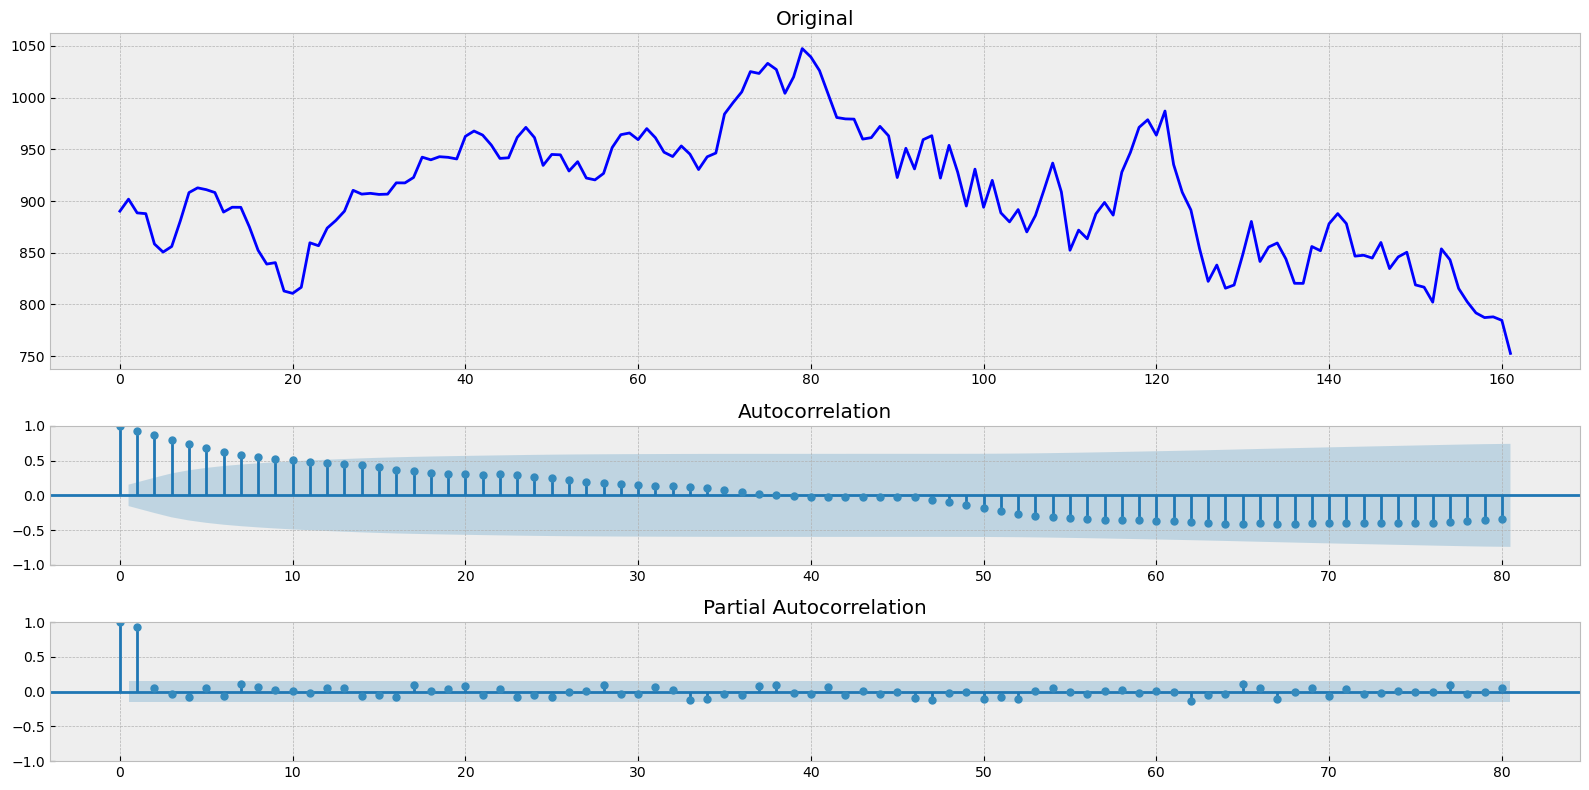

In [77]:
tsplot(w_c_dowjones, lags = len(w_c_dowjones)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


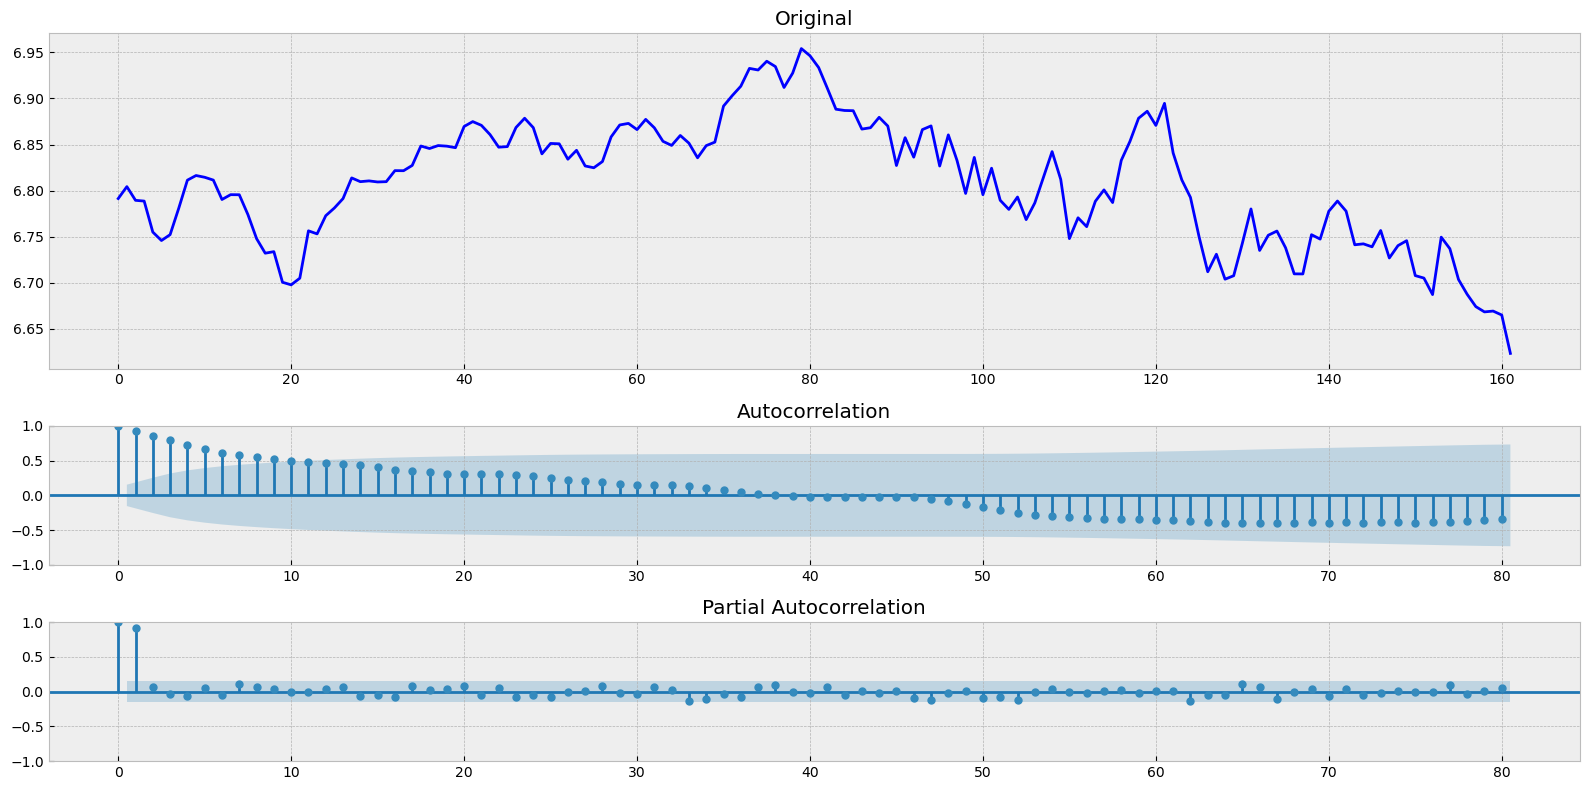

In [78]:
w_c_dowjones = boxcox(w_c_dowjones, 0)
tsplot(w_c_dowjones, lags = len(w_c_dowjones)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


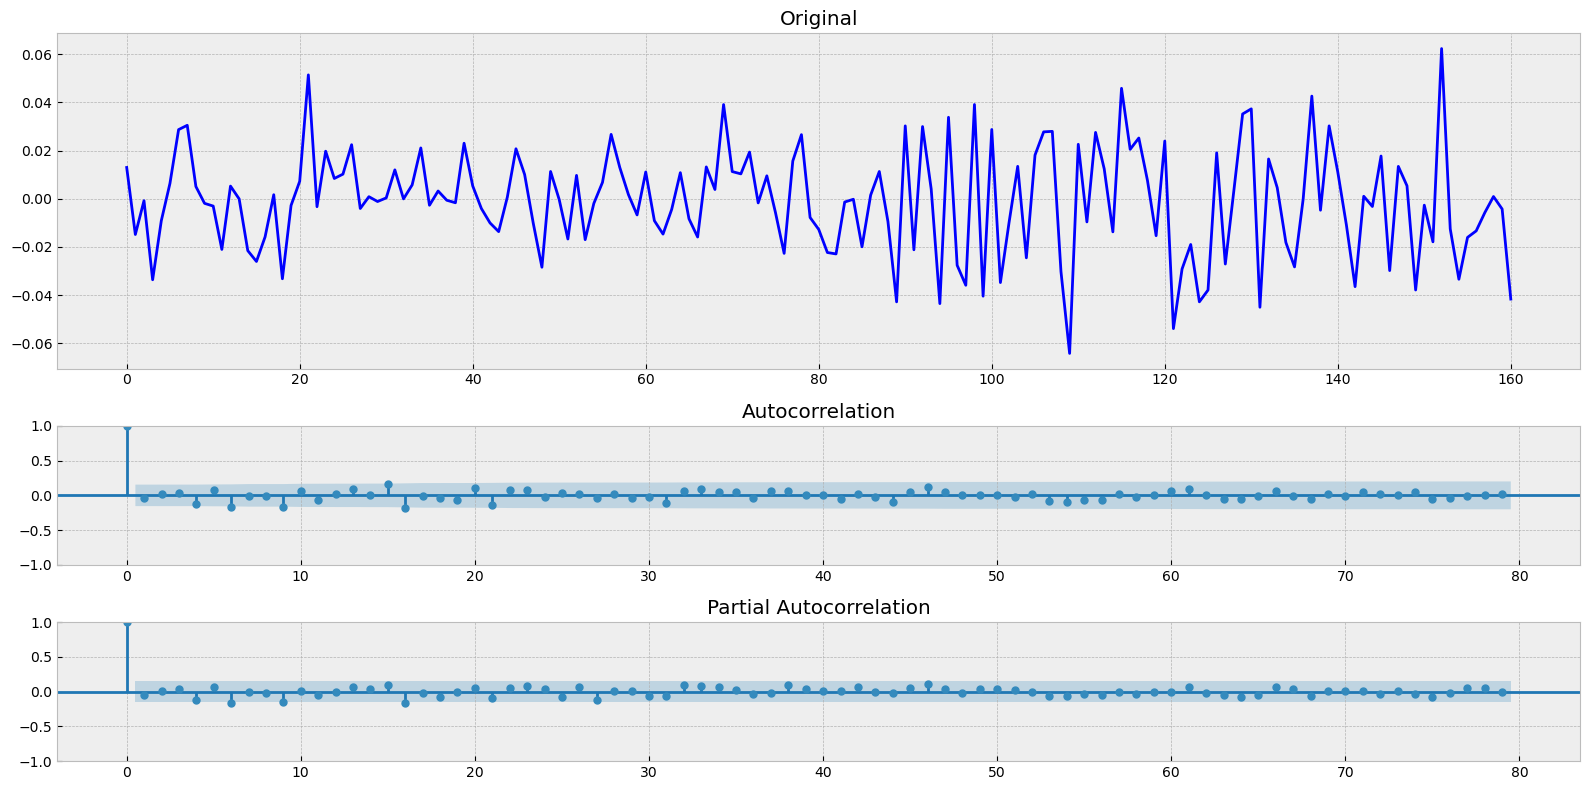

In [79]:
w_c_dowjones = w_c_dowjones[1:] - w_c_dowjones[: -1]
tsplot(w_c_dowjones, lags = len(w_c_dowjones)/2 - 1)

p-value значительно ниже 0,05 и дает возможность отвергнуть гипотезу о нестационарности ряда.
Однако, сомневаюсь, что такой ряд можно считать стационарным. В первой половине дисперсия ниже, чем во второй. 
Возможно, такой ряд нельзя привести к стационарному.

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


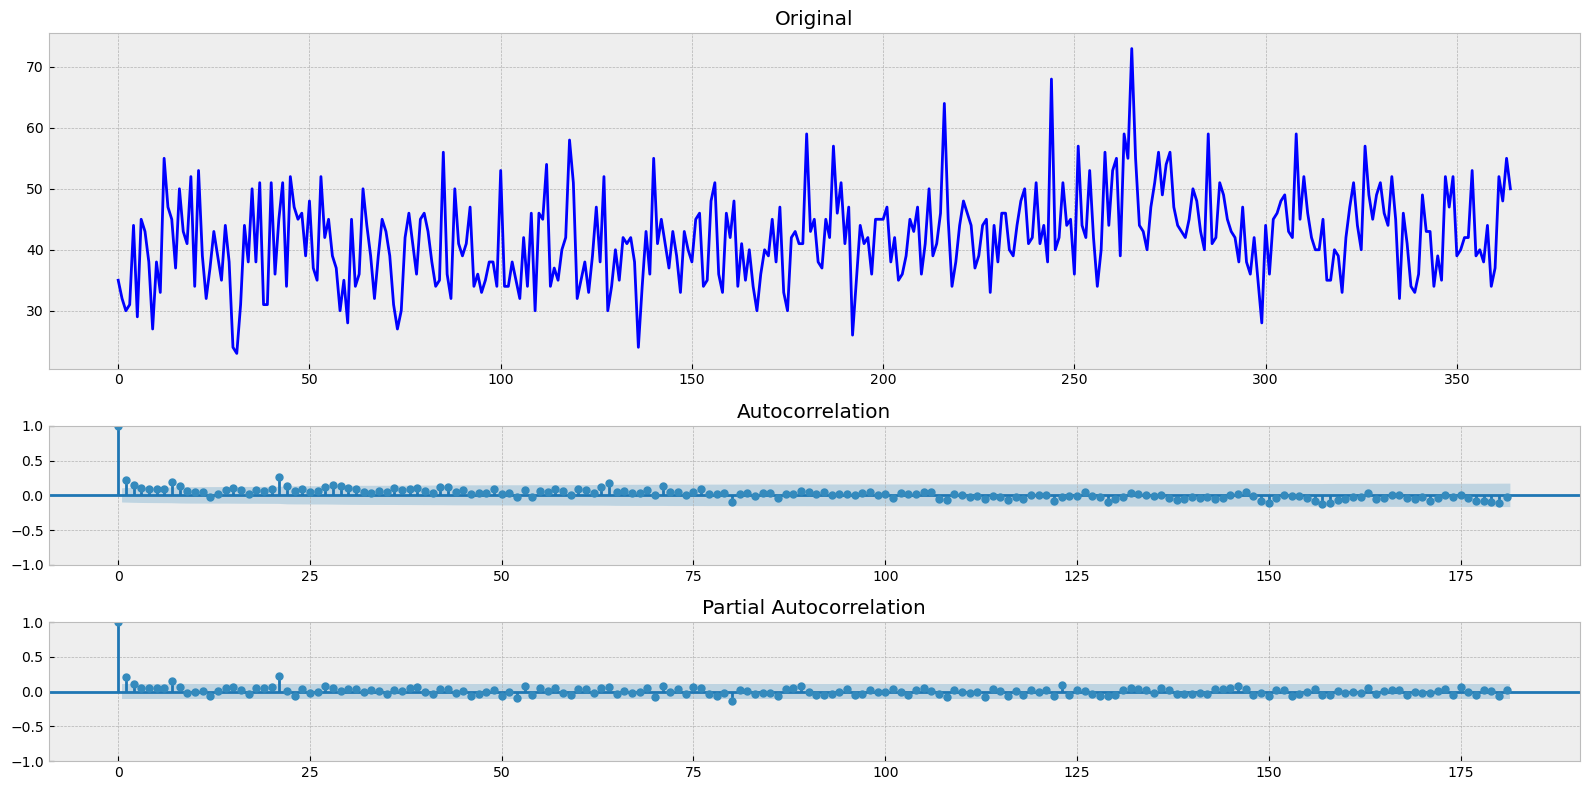

In [80]:
tsplot(d_t_female, lags = len(d_t_female)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


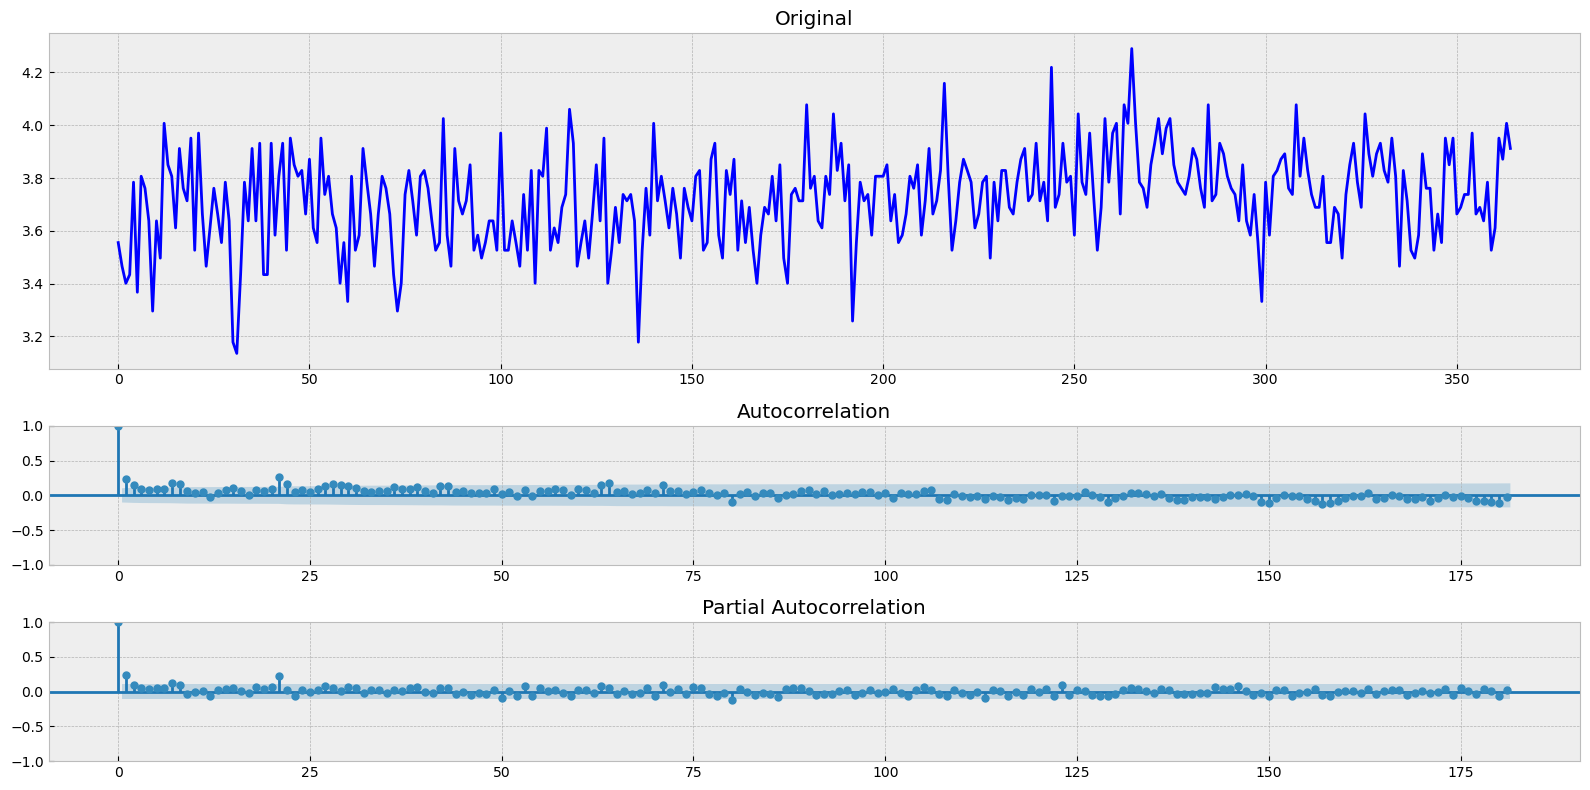

In [81]:
d_t_female = boxcox(d_t_female, 0)
tsplot(d_t_female, lags = len(d_t_female)/2 - 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


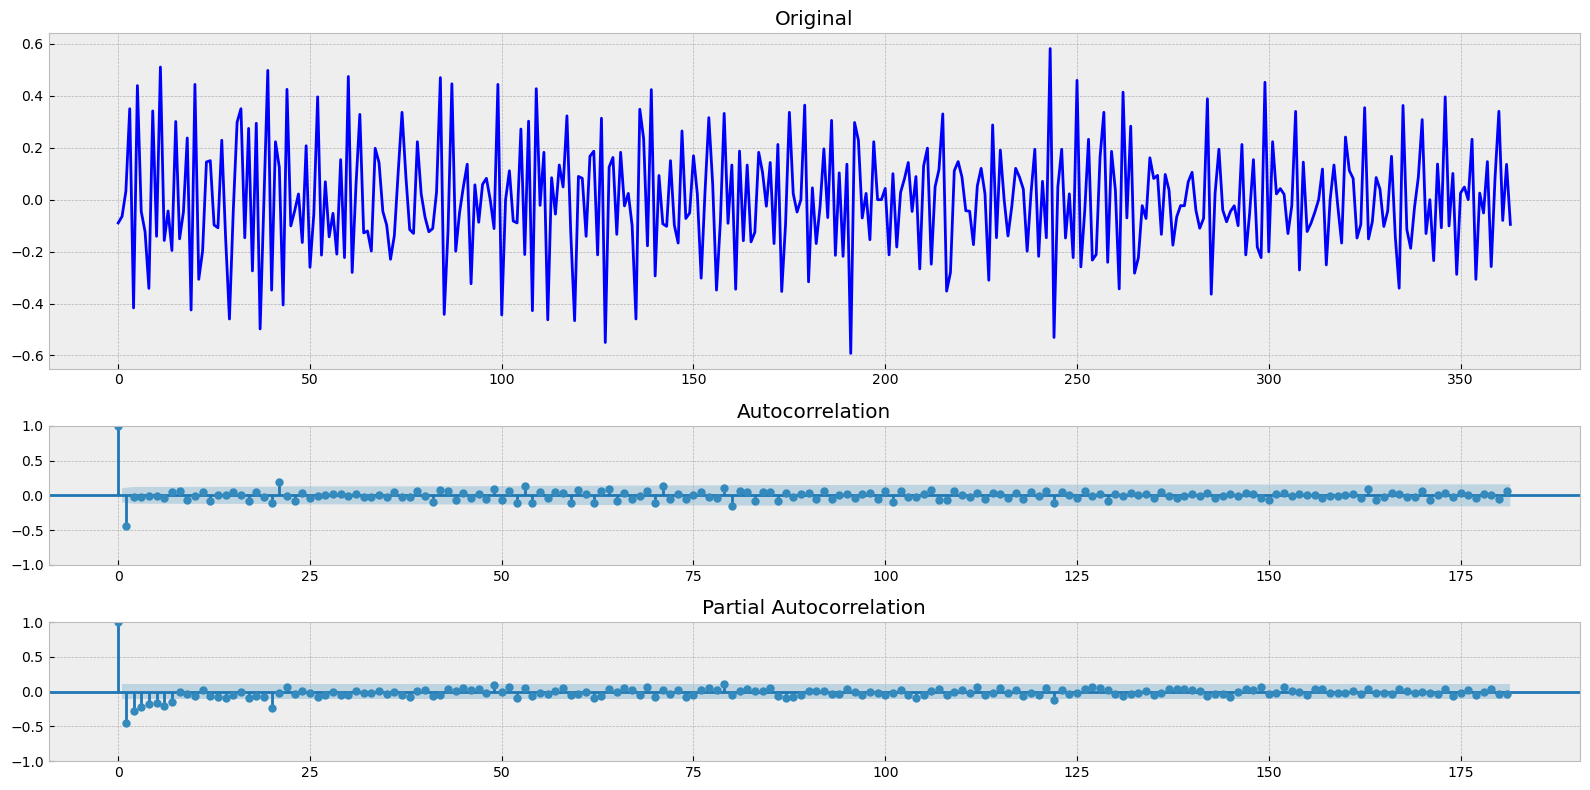

In [82]:
# прослеживается некоторый тренд, или несколько локальных трендов(?). Продифференцирую
d_t_female = d_t_female[1:] - d_t_female[: -1]
tsplot(d_t_female, lags = len(d_t_female)/2 - 1)

p-value значительно ниже 0,05 и дает возможность отвергнуть гипотезу о нестационарности ряда. График стал очень похож на шум.